# 판다스(Pandas) 2


여기서는 아래와 같은 내용을 다룬다. 

* csv 파일 불러오기
* 결측치 처리
* 데이터프레임 합하기
* 데이터 시각화(막대 그래프, 원 그래프, 선 그래프, 산점도) 

`drinks.csv`에는 국가별 음주 데이터가 담겨있다.   


참고) csv는 Comma-Separated Values의 줄임말로, 콤마(,)를 기준으로 항목을 구분하여 정리되어 있는 파일을 의미한다. 


우선, pandas 모듈을 임포트하자. 

In [1]:
import pandas as pd

## 데이터 호출1

csv 파일을 불러오기 위해, pandas 모듈의 `read_csv` 함수를 이용한다.   
`read_csv` 함수에 대해 알고 싶으면, `help` 함수를 사용하여 확인할 수 있다. 

> `help(pd.read_csv)`  

`read_csv` 함수는 많은 인자들을 받을 수 있지만 여기서 우리는 csv 파일의 위치만 사용한다.  


In [2]:
drinks = pd.read_csv('drinks.csv')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


`drinks`의 타입을 확인하면, 판다스 모듈의 데이터프레임이다. 

In [3]:
type(drinks)

pandas.core.frame.DataFrame

데이터프레임 `drinks`의 처음 7개의 데이터를 확인해보자.

In [4]:
drinks.head(7)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA


데이터프레임 `drinks`의 끝에 있는 5개의 데이터를 확인해보자.  

In [5]:
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


`drinks`의 열(column) 이름을 확인해보자.

In [6]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

`drinks`의 인덱스(index)를 확인해보자. 

In [7]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

`info()` 메서드로 데이터의 기본 정보 몇 가지를 확인해보자. 

In [8]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


`drinks`의 `continent`열에는 23개의 결측치가 있는 것을 알 수 있다. 이는 아래의 코드로도 확인 가능하다. 

In [9]:
drinks.continent.isnull().sum()

23

`describe()` 메서드로 빈도수, 평균, 표준편차, 최댓값, 최솟값 등과 같은 기초통계량을 확인할 수 있다. 

In [10]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


`unique()` 메서드를 사용하면, 중복 값을 제거하고 유일한 값만을 보여준다.  
예를 들어, `continent`열에 어떠한 항목들이 있는지 알고 싶을 때 아래와 같이 `unique()` 메서드를 사용할 수 있다. 

In [11]:
drinks.continent.unique()

array(['AS', 'EU', 'AF', nan, 'SA', 'OC'], dtype=object)

`value_counts()` 메서드는 유일한 값과 그 개수를 확인할 때 사용한다. 

In [12]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

## 데이터 분석  

예를 들어, 맥주 소비량이 가장 높은 나라의 이름을 찾기 위해서 다음 두 가지 방식 중에 한 가지를 활용할 수 있다.  

* 방법 1 : `beer_servings` 열을 기준으로 내림차순으로 정렬한 후 첫째 항 선택
* 방법 2 : `beer_servings` 열에 대해 `max()` 메서드 적용. 

* 방법 1 : 특정 열을 기준으로 내림차순으로 정렬하는 방법은 아래와 같다. 

In [13]:
sorted_beer = drinks.sort_values('beer_servings', ascending=False)
sorted_beer

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,AF
45,Czech Republic,361,170,134,11.8,EU
62,Gabon,347,98,59,8.9,AF
65,Germany,346,117,175,11.3,EU
98,Lithuania,343,244,56,12.9,EU
...,...,...,...,...,...,...
107,Mauritania,0,0,0,0.0,AF
158,Somalia,0,0,0,0.0,AF
111,Monaco,0,0,0,0.0,EU
128,Pakistan,0,0,0,0.0,AS


이제 첫째 행을 확인하면 된다. 

In [14]:
sorted_beer.head(1)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,AF


맥주 소비량이 가장 높은 나라는 나미비아Namibia인 것을 알 수 있다. 

* 방법 2 : `beer_servings`열의 포함된 숫자들을 대상으로 최댓값을 찾기 위해 `max()` 메서드를 적용하는 방식은 다음과 같다. 특정 열에 대해 일괄적으로 어떤 메서드를 적용하는 방식은 `max()` 메서드를 활용하는 방식과 유사하다. 

In [15]:
drinks['beer_servings'].max()

376

최댓값은 376이다. 이제 `beer_servings` 열의 값이 376인 데이터를 확인하자. 

In [16]:
drinks[drinks.beer_servings == drinks.beer_servings.max()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,AF


### groupby()  

데이터를 그룹별로 나누어 분석하고자 할 때, `groupby()`를 사용할 수 있다.  
예를 들어, `drinks`를 대륙(continent)별로 분석하고 싶다면, 아래와 같이 코드를 작성하면 된다.   

In [17]:
drinks_gp = drinks.groupby('continent')  #그룹을 만들 때 누락된 값(nan)은 무시됨. 
drinks_gp

`drinks_gp`은 `GroupBy`객체로, 그룹 연산을 위해 필요한 정보를 가지고 있다.    
아래와 같이 `for ... in `문을 사용하면, 그룹명과 그 그룹에 해당하는 데이터를 튜플로 묶어 보여준다.  

In [18]:
for gp in drinks_gp :
    print(gp)

('AF',                       country  beer_servings  spirit_servings  wine_servings  \
2                     Algeria             25                0             14   
4                      Angola            217               57             45   
18                      Benin             34                4             13   
22                   Botswana            173               35             35   
26               Burkina Faso             25                7              7   
27                    Burundi             88                0              0   
28              Cote d'Ivoire             37                1              7   
29                 Cabo Verde            144               56             16   
31                   Cameroon            147                1              4   
33   Central African Republic             17                2              1   
34                       Chad             15                1              1   
38                    Comoros    

예를 들어, 대륙별 각 열의 평균이 알고 싶다면, `GroupBy` 객체에 `mean()` 메서드를 사용하면 된다. 

In [19]:
drinks_gp.mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


그룹별 특정열에 대한 분석도 할 수 있다.  
예를 들어, 대륙별 맥주 소비량의 평균이 알고 싶다면, 아래와 같이 코드를 작성하면 된다. 

In [20]:
beer_mean = drinks_gp.beer_servings.mean()
beer_mean

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

`median()` 메서드를 사용하여, 대륙별 맥주 소비량의 중앙값을 구할 수도 있다. 

In [21]:
beer_median = drinks_gp.beer_servings.median()
beer_median

continent
AF     32.0
AS     17.5
EU    219.0
OC     52.5
SA    162.5
Name: beer_servings, dtype: float64

대륙별 와인 소비량의 평균을 확인해보자. 

In [22]:
wine_mean = drinks_gp.wine_servings.mean()
wine_mean

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

대륙별 와인 소비량의 중앙값도 확인해보자. 

In [23]:
wine_median = drinks_gp.wine_servings.median()
wine_median

continent
AF      2.0
AS      1.0
EU    128.0
OC      8.5
SA     12.0
Name: wine_servings, dtype: float64

## 데이터 시각화1   

데이터 분석을 위해 기본적으로 하는 일 중 하나가 데이터 시각화이다. 데이터를 시각화하는 것은 어렵지 않지만, 적합한 시각화를 만드는 일은 매우 어려우며, 많은 훈련과 직관이 요구된다.  

여기서는 데이터를 시각화하는 기본적인 두 가지 방법을 배운다.  

* 막대 그래프 
* 원 그래프


### 막대 그래프  

막대 그래프는 각 항목의 크기를 한 눈에 비교할 수 있도록 도와주는 그래프이다.  
`plt.bar()` 를 이용하여 막대 그래프를 그릴 수 있다. 

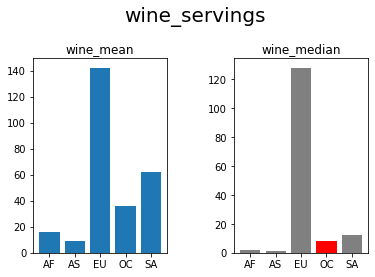

In [24]:
import matplotlib.pyplot as plt

colors = ['gray', 'gray', 'gray', 'red', 'gray'] # 각 막대의 색을 담은 리스트

fig = plt.figure() # 그래프를 그릴 도화지
fig.suptitle('wine_servings', fontsize=20)  #큰 제목 더하기

plt.subplot(1, 2, 1) # 도화지 분할
plt.bar(wine_mean.index, wine_mean)  #막대 그래프 그리기
plt.title('wine_mean')  # 제목 더하기

plt.subplot(1, 2, 2) # 도화지 분할
plt.bar(wine_median.index, wine_median, color = colors)  #막대 그래프 그리기, 색은 colors로 지정
plt.title('wine_median') #제목 더하기

plt.subplots_adjust(top = 0.80, wspace = 0.5) # 그래프간 간격 조절

plt.show()

### 원 그래프(파이 차트)  

원 그래프는 각 항목이 전체에서 차지하는 비중을 한 눈에 알아볼 수 있도록 도와주는 그래프이다.  
`plt.pie()` 를 이용하여 원 그래프를 그릴 수 있다. 

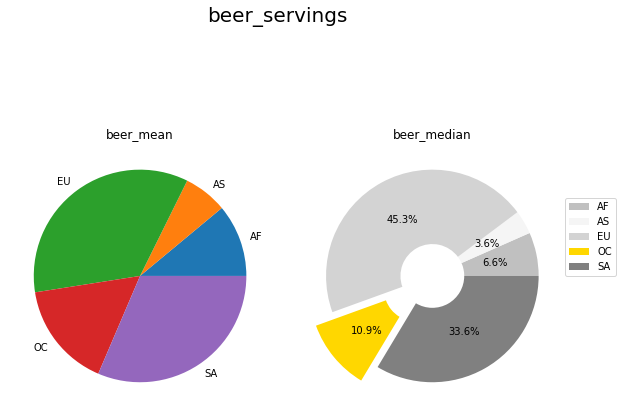

In [25]:
colors = ['silver', 'whitesmoke', 'lightgray', 'gold', 'gray'] # 각 조각의 색을 담은 리스트
explode = [0.0, 0.0, 0.0, 0.2, 0.0]   #특정 조각을 돌출시켜 강조하기 위한 값 지정
wedgeprops={'width': 0.7} 

fig = plt.figure(figsize = (10, 8)) #그래프를 그릴 도화지, figsize로 그래프의 크기 변경가능!
fig.suptitle('beer_servings', fontsize=20) #큰 제목 더하기

plt.subplot(1, 2, 1) #도화지 분할
plt.pie(beer_mean, labels = beer_mean.index) #원 그래프 그리기, labels는 원 조각에 라벨 지정 
plt.title('beer_mean') #제목 더하기

plt.subplot(1, 2, 2) #도화지 분할

# autopct은 각 조각의 전체 대비 백분율 표시 방법 지정
# colors로 색 지정
# explode는 특정 조각을 돌출시키기 위해 지정
# 도넛 모양의 그래프를 그리고 싶다면, wedgeprops를 딕셔너리로 설정.  
plt.pie(beer_median, autopct = '%0.1f%%', colors = colors, explode=explode, wedgeprops=wedgeprops) 
plt.title('beer_median') #제목 더하기
plt.legend(beer_median.index, loc = (1, 0.5))

plt.subplots_adjust(top = 0.90, wspace = 0.1) #그래프간 간격 조절

plt.savefig('wine_servings.png') #그래프 저장하기

plt.show()

## 데이터 호출2


`pd.read_csv()` 함수를 이용해, `ABdata.csv` 파일을 불러오자.  

In [26]:
import pandas as pd

ab_df = pd.read_csv('ABdata.csv')
ab_df

,rng,A,B,gp
0,2019-01-07,10.0,36.0,gp1
1,2019-01-14,NaN,21.0,gp1
2,2019-01-21,91.0,107.0,gp4
3,2019-01-28,15.0,39.0,gp2
4,2019-02-04,15.0,24.0,gp1
...,...,...,...,...
112,2021-03-01,1.0,29.0,gp1
113,2021-03-08,50.0,65.0,gp3
114,2021-03-15,15.0,53.0,gp2
115,2021-03-22,1.0,39.0,gp1


특정 열을 인덱스로 사용하고 싶다면, `index_col`이라는 매개변수를 사용하면 된다.  
예를 들어, 아래는 `rng`열을 인덱스로 사용하는 코드이다. 

In [27]:
ab_df_rng = pd.read_csv('ABdata.csv', index_col = 'rng')
ab_df_rng

,A,B,gp
rng,,,
2019-01-07,10.0,36.0,gp1
2019-01-14,NaN,21.0,gp1
2019-01-21,91.0,107.0,gp4
2019-01-28,15.0,39.0,gp2
2019-02-04,15.0,24.0,gp1
...,...,...,...
2021-03-01,1.0,29.0,gp1
2021-03-08,50.0,65.0,gp3
2021-03-15,15.0,53.0,gp2


`info()` 메서드로 데이터의 기본 정보 몇 가지를 확인해보자.

In [28]:
ab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rng     117 non-null    object 
 1   A       107 non-null    float64
 2   B       111 non-null    float64
 3   gp      117 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.8+ KB


`describe()` 메서드로 기초통계량을 확인해보자. 

In [29]:
ab_df.describe()

,A,B
count,107.000000,111.000000
mean,37.607477,57.396396
std,25.648111,24.959705
min,1.000000,21.000000
25%,17.000000,38.500000
50%,35.000000,54.000000
75%,55.500000,72.000000
max,97.000000,119.000000


## 데이터 전처리  

여러 개의 데이터를 합하는 방법과 결측치를 처리하는 방법을 살펴보자.   

`pd.read_csv()` 함수를 이용해 `ABdata1.csv`파일을 불러오자. 

In [30]:
ab_df1 = pd.read_csv('ABdata1.csv')
ab_df1

,rng,A,B,gp
0,2021-04-05,12,34,gp1
1,2021-04-12,18,28,gp1
2,2021-04-19,11,26,gp3
3,2021-04-26,7,36,gp3


**데이터프레임 합하기**

`pd.concat()` 함수를 이용하면 여러 개의 데이터를 하나로 합할 수 있다.  
예를 들어, `ab_df`와 `ab_df1`를 위아래(행방향)로 합하고 싶으면, 아래와 같이 코드를 작성하면 된다. 

In [31]:
ab_df_concat = pd.concat([ab_df, ab_df1])
ab_df_concat

,rng,A,B,gp
0,2019-01-07,10.0,36.0,gp1
1,2019-01-14,NaN,21.0,gp1
2,2019-01-21,91.0,107.0,gp4
3,2019-01-28,15.0,39.0,gp2
4,2019-02-04,15.0,24.0,gp1
...,...,...,...,...
116,2021-03-29,58.0,61.0,gp3
0,2021-04-05,12.0,34.0,gp1
1,2021-04-12,18.0,28.0,gp1
2,2021-04-19,11.0,26.0,gp3


합할 때 인덱스도 그대로 가져온다. 매개변수`ignore_index`를 `True`로 지정하면 인덱스를 재배열한다. 

In [32]:
ab_df_concat = pd.concat([ab_df, ab_df1], ignore_index=True)
ab_df_concat

,rng,A,B,gp
0,2019-01-07,10.0,36.0,gp1
1,2019-01-14,NaN,21.0,gp1
2,2019-01-21,91.0,107.0,gp4
3,2019-01-28,15.0,39.0,gp2
4,2019-02-04,15.0,24.0,gp1
...,...,...,...,...
116,2021-03-29,58.0,61.0,gp3
117,2021-04-05,12.0,34.0,gp1
118,2021-04-12,18.0,28.0,gp1
119,2021-04-19,11.0,26.0,gp3


데이터를 좌우(열방향)로 합하는 방법도 살펴보자.  
이를 위해 `ABdata2.csv`를 불러온다. 

In [33]:
ab_df2 = pd.read_csv('ABdata2.csv')
ab_df2

,C,D
0,80.0,NaN
1,18.0,NaN
2,68.0,NaN
3,89.0,78.0
4,12.0,48.0
...,...,...
116,22.0,NaN
117,65.0,NaN
118,65.0,NaN
119,84.0,NaN


데이터를 좌우(열방향)로 합할 때는 아래와 같이 `axis`를 `1`로 지정하면 된다.

In [34]:
df = pd.concat([ab_df_concat, ab_df2], axis=1)
df

,rng,A,B,gp,C,D
0,2019-01-07,10.0,36.0,gp1,80.0,NaN
1,2019-01-14,NaN,21.0,gp1,18.0,NaN
2,2019-01-21,91.0,107.0,gp4,68.0,NaN
3,2019-01-28,15.0,39.0,gp2,89.0,78.0
4,2019-02-04,15.0,24.0,gp1,12.0,48.0
...,...,...,...,...,...,...
116,2021-03-29,58.0,61.0,gp3,22.0,NaN
117,2021-04-05,12.0,34.0,gp1,65.0,NaN
118,2021-04-12,18.0,28.0,gp1,65.0,NaN
119,2021-04-19,11.0,26.0,gp3,84.0,NaN


이제 합한 데이터프레임을 csv 파일로 저장해보자. 

`to_csv` 메소드를 이용하면, 데이터프레임을 csv 파일로 저장할 수 있다. 이때, 인덱스와 열 이름은 함께 저장되는데,   
이를 포함하지 않으려면 아래와 같이 `index`와 `header`를 각각 `False`로 두면 된다. 

In [35]:
df.to_csv('df.csv', index= False, header=False)

참고) `pd.merge()`를 사용하여 데이터프레임을 합할 수도 있다. 
예제와 함께 살펴보자. 

In [36]:
# 데이터프레임 df1과 df2를 만들자.
df1 = pd.DataFrame({'key' : ['a', 'b', 'c', 'd'], 'data1' : [5, 10, 15, 20]})  
df2 = pd.DataFrame({'key' : ['a', 'c', 'g', 'h', 'k'], 'data2' : [2, 3, 4, 5, 6]})

# pd.merge()를 사용하면, 두 데이터프레임에 공통으로 있는 열을 기준으로 합해준다. 
df3 = pd.merge(df1, df2)
df3

,key,data1,data2
0,a,5,2
1,c,15,3


In [37]:
df1 = pd.DataFrame({'key1' : ['a', 'b', 'c', 'd'], 'data1' : [5, 10, 15, 20]})
df2 = pd.DataFrame({'key2' : ['a', 'c', 'g', 'h', 'k'], 'data2' : [2, 3, 4, 5, 6]})

# 두 데이터프레임에 공통으로 있는 열이 없는 경우, 어느 열을 기준으로 할지 지정해줄 수 있다. 
# left_on에는 왼쪽 데이터프레임(df1)에서 기준으로 할 열(column)이름을, right_on에는 오른쪽 데이터프레임에서 기준으로 할 열(right_on)이름을 지정
df3 = pd.merge(df1, df2, left_on = 'key1', right_on = 'key2')
df3

,key1,data1,key2,data2
0,a,5,a,2
1,c,15,c,3


**결측치 처리**  

데이터프레임 `df`에는 여러 결측치가 보인다. 각 열에 있는 결측치의 개수를 확인해보자. 

In [38]:
df.isnull().sum()

rng     0
A      10
B       6
gp      0
C       4
D      56
dtype: int64

결측치가 많은 `D`열을 삭제하고자 할 때는 `del`을 이용한다. 

In [39]:
del df['D']

데이터프레임 `df`을 다시 확인해보자. 

In [40]:
df

,rng,A,B,gp,C
0,2019-01-07,10.0,36.0,gp1,80.0
1,2019-01-14,NaN,21.0,gp1,18.0
2,2019-01-21,91.0,107.0,gp4,68.0
3,2019-01-28,15.0,39.0,gp2,89.0
4,2019-02-04,15.0,24.0,gp1,12.0
...,...,...,...,...,...
116,2021-03-29,58.0,61.0,gp3,22.0
117,2021-04-05,12.0,34.0,gp1,65.0
118,2021-04-12,18.0,28.0,gp1,65.0
119,2021-04-19,11.0,26.0,gp3,84.0


`A`열에서 결측치인 데이터는 아래와 같이 확인 가능하다. 

In [41]:
df[df.A.isnull()]

,rng,A,B,gp,C
1,2019-01-14,NaN,21.0,gp1,18.0
9,2019-03-11,NaN,31.0,gp1,8.0
18,2019-05-13,NaN,42.0,gp2,29.0
24,2019-06-24,NaN,58.0,gp2,18.0
46,2019-11-25,NaN,53.0,gp2,15.0
56,2020-02-03,NaN,39.0,gp1,94.0
65,2020-04-06,NaN,37.0,gp1,46.0
68,2020-04-27,NaN,70.0,gp3,92.0
84,2020-08-17,NaN,55.0,gp3,89.0
98,2020-11-23,NaN,57.0,gp3,5.0


결측치는 `fillna()`를 사용해 다른 값으로 대체할 수 있다. 인자로 대체하고 싶은 값을 사용하면 된다.  
예를 들어, 모든 결측치를 0으로 변경하려면 `fillna()`의 인자로 0을 사용하면 된다.   
확인하면, A열의 1번 인덱스 값은 `NaN`에서 0으로 변경되었다.  

주의) 기존의 데이터프레임 `df`는 변경되지 않는다. 

In [42]:
df.fillna(0)

,rng,A,B,gp,C
0,2019-01-07,10.0,36.0,gp1,80.0
1,2019-01-14,0.0,21.0,gp1,18.0
2,2019-01-21,91.0,107.0,gp4,68.0
3,2019-01-28,15.0,39.0,gp2,89.0
4,2019-02-04,15.0,24.0,gp1,12.0
...,...,...,...,...,...
116,2021-03-29,58.0,61.0,gp3,22.0
117,2021-04-05,12.0,34.0,gp1,65.0
118,2021-04-12,18.0,28.0,gp1,65.0
119,2021-04-19,11.0,26.0,gp3,84.0


`A`열에서 결측치인 데이터를 확인해보면, 모두 0으로 대체된 것을 볼 수 있다. 

In [43]:
df.fillna(0)[df.A.isnull()]

,rng,A,B,gp,C
1,2019-01-14,0.0,21.0,gp1,18.0
9,2019-03-11,0.0,31.0,gp1,8.0
18,2019-05-13,0.0,42.0,gp2,29.0
24,2019-06-24,0.0,58.0,gp2,18.0
46,2019-11-25,0.0,53.0,gp2,15.0
56,2020-02-03,0.0,39.0,gp1,94.0
65,2020-04-06,0.0,37.0,gp1,46.0
68,2020-04-27,0.0,70.0,gp3,92.0
84,2020-08-17,0.0,55.0,gp3,89.0
98,2020-11-23,0.0,57.0,gp3,5.0


`B`열에서 결측치인 데이터도 모두 0으로 대체되었다. 



In [44]:
df.fillna(0)[df.B.isnull()]

,rng,A,B,gp,C
6,2019-02-18,13.0,0.0,gp1,13.0
15,2019-04-22,5.0,0.0,gp1,13.0
86,2020-08-31,18.0,0.0,gp2,52.0
93,2020-10-19,10.0,0.0,gp1,19.0
96,2020-11-09,36.0,0.0,gp2,45.0
101,2020-12-14,55.0,0.0,gp3,81.0


마찬가지로, `C`열에서 결측치인 데이터도 모두 0으로 대체되었다. 

In [45]:
df.fillna(0)[df.C.isnull()]

,rng,A,B,gp,C
7,2019-02-25,22.0,56.0,gp2,0.0
13,2019-04-08,6.0,34.0,gp1,0.0
26,2019-07-08,23.0,46.0,gp2,0.0
87,2020-09-07,36.0,39.0,gp2,0.0


`fillna()`함수의 `method`를 `ffill`로 지정하면, 결측치의 위치 위쪽으로부터 가장 가까운 값을 이용하여 결측치가 채워진다.  

참고) ffill는 forward fill 방식의 줄임말이다. 

In [46]:
df.fillna(method='ffill')

,rng,A,B,gp,C
0,2019-01-07,10.0,36.0,gp1,80.0
1,2019-01-14,10.0,21.0,gp1,18.0
2,2019-01-21,91.0,107.0,gp4,68.0
3,2019-01-28,15.0,39.0,gp2,89.0
4,2019-02-04,15.0,24.0,gp1,12.0
...,...,...,...,...,...
116,2021-03-29,58.0,61.0,gp3,22.0
117,2021-04-05,12.0,34.0,gp1,65.0
118,2021-04-12,18.0,28.0,gp1,65.0
119,2021-04-19,11.0,26.0,gp3,84.0


잘 변경되었는지 몇 개 확인해보자.  
`A`열의 1번 인덱스 값은 바로 위쪽 값인 10으로 대체되었고,  `B`열의 6번 인덱스 값도 바로 위의 값인 56으로 변경되었다. 

In [47]:
print(df.head(10))
print('=======================')
print(df.fillna(method='ffill').head(10))

          rng     A      B   gp     C
0  2019-01-07  10.0   36.0  gp1  80.0
1  2019-01-14   NaN   21.0  gp1  18.0
2  2019-01-21  91.0  107.0  gp4  68.0
3  2019-01-28  15.0   39.0  gp2  89.0
4  2019-02-04  15.0   24.0  gp1  12.0
5  2019-02-11  22.0   56.0  gp2  87.0
6  2019-02-18  13.0    NaN  gp1  13.0
7  2019-02-25  22.0   56.0  gp2   NaN
8  2019-03-04  36.0   48.0  gp2  10.0
9  2019-03-11   NaN   31.0  gp1   8.0
          rng     A      B   gp     C
0  2019-01-07  10.0   36.0  gp1  80.0
1  2019-01-14  10.0   21.0  gp1  18.0
2  2019-01-21  91.0  107.0  gp4  68.0
3  2019-01-28  15.0   39.0  gp2  89.0
4  2019-02-04  15.0   24.0  gp1  12.0
5  2019-02-11  22.0   56.0  gp2  87.0
6  2019-02-18  13.0   56.0  gp1  13.0
7  2019-02-25  22.0   56.0  gp2  13.0
8  2019-03-04  36.0   48.0  gp2  10.0
9  2019-03-11  36.0   31.0  gp1   8.0


딕셔너리를 사용하여 각 열마다 다른 값을 채워 넣을 수도 있다.  
예를 들어, 아래는 `A`열의 결측치는 0으로, `B`열의 결측치는 1로, `C`열의 결측치는 2로 변경하라는 코드이다. 

In [48]:
values = {'A' : 0, 'B' : 1, 'C' : 2}
df.fillna(value=values)

,rng,A,B,gp,C
0,2019-01-07,10.0,36.0,gp1,80.0
1,2019-01-14,0.0,21.0,gp1,18.0
2,2019-01-21,91.0,107.0,gp4,68.0
3,2019-01-28,15.0,39.0,gp2,89.0
4,2019-02-04,15.0,24.0,gp1,12.0
...,...,...,...,...,...
116,2021-03-29,58.0,61.0,gp3,22.0
117,2021-04-05,12.0,34.0,gp1,65.0
118,2021-04-12,18.0,28.0,gp1,65.0
119,2021-04-19,11.0,26.0,gp3,84.0


`A`열에서 결측치인 데이터를 확인해보면, 모두 0으로 대체되었다.

In [49]:
df.fillna(value=values)[df.A.isnull()]

,rng,A,B,gp,C
1,2019-01-14,0.0,21.0,gp1,18.0
9,2019-03-11,0.0,31.0,gp1,8.0
18,2019-05-13,0.0,42.0,gp2,29.0
24,2019-06-24,0.0,58.0,gp2,18.0
46,2019-11-25,0.0,53.0,gp2,15.0
56,2020-02-03,0.0,39.0,gp1,94.0
65,2020-04-06,0.0,37.0,gp1,46.0
68,2020-04-27,0.0,70.0,gp3,92.0
84,2020-08-17,0.0,55.0,gp3,89.0
98,2020-11-23,0.0,57.0,gp3,5.0


`B`열에서 결측치는 모두 1로 채워졌다. 

In [50]:
df.fillna(value=values)[df.B.isnull()]

,rng,A,B,gp,C
6,2019-02-18,13.0,1.0,gp1,13.0
15,2019-04-22,5.0,1.0,gp1,13.0
86,2020-08-31,18.0,1.0,gp2,52.0
93,2020-10-19,10.0,1.0,gp1,19.0
96,2020-11-09,36.0,1.0,gp2,45.0
101,2020-12-14,55.0,1.0,gp3,81.0


`C`열에서 결측치는 모두 2로 변경되었다. 

In [51]:
df.fillna(value=values)[df.C.isnull()]

,rng,A,B,gp,C
7,2019-02-25,22.0,56.0,gp2,2.0
13,2019-04-08,6.0,34.0,gp1,2.0
26,2019-07-08,23.0,46.0,gp2,2.0
87,2020-09-07,36.0,39.0,gp2,2.0


`fillna()` 함수를 사용했을 때 기존 데이터프레임은 변경되지 않는데, `inplace`를 `True`로 지정하면 기존의 데이터프레임을 변경할 수 있다. 

In [52]:
df.fillna(method='ffill', inplace=True)
df

,rng,A,B,gp,C
0,2019-01-07,10.0,36.0,gp1,80.0
1,2019-01-14,10.0,21.0,gp1,18.0
2,2019-01-21,91.0,107.0,gp4,68.0
3,2019-01-28,15.0,39.0,gp2,89.0
4,2019-02-04,15.0,24.0,gp1,12.0
...,...,...,...,...,...
116,2021-03-29,58.0,61.0,gp3,22.0
117,2021-04-05,12.0,34.0,gp1,65.0
118,2021-04-12,18.0,28.0,gp1,65.0
119,2021-04-19,11.0,26.0,gp3,84.0


## 데이터 시각화2  

여기서는 데이터를 시각화하는 두 가지 방법을 살펴보자. 

* 선 그래프
* 산점도 

### 선 그래프  

선 그래프는 변화 추이를 살펴보는 것을 도와주는 그래프이다.  
plt.plot() 를 이용하여 선 그래프를 그릴 수 있다.  

예를 들어, 데이터프레임 `df`의 일부 자료로 선 그래프를 그려보자.  


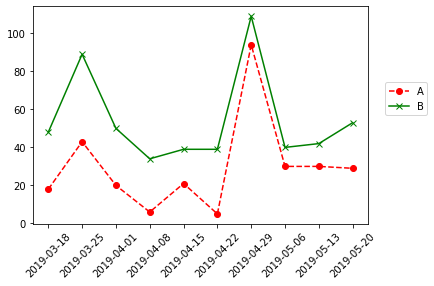

In [53]:
import matplotlib.pyplot as plt

# x축에 rng열에 있는 연도 일부, y축에 A열에 있는 데이터 일부로 선 그래프 만들기
plt.plot(df.rng[10:20], df.A[10:20], linestyle='--', marker = 'o', color = 'red') #선 스타일은 --로, 마커를 o로 두면, 각 점에 o가 표시됨, 선 색은 red
plt.plot(df.rng[10:20], df.B[10:20], marker = 'x', color ='green') # 마커를 x로 두면, 각 점에 x가 표시됨, 선 색은 green
plt.legend(('A', 'B'), loc=(1.05, 0.5))  #범례는 plt.legend()로 표시할 수 있음, loc를 이용해 위치 조정
plt.xticks(range(10), df.rng[10:20], rotation=45)  #xticks()를 이용해 x축의 눈금을 변경. 

plt.show()

### 산점도  

산점도는 두 변수의 관계를 보여주는 데에 매우 적합한 그래프이다.   

산점도를 그리기 전에 피어슨 상관계수(Pearson correlation coefficient)를 구해보자.  
피어슨 상관계수는 두 변수 간의 관련성 정도를 나타낸다.  

> 두 변수 X와 Y의 상관계수(r) = X와 Y가 함께 변하는 정도와 X와 Y가 따로 변하는 정도 사이의 비율 

의미:
* r = 1: X와 Y 가 완전히 동일.
* r = 0: X와 Y가 아무 연관이 없음.
* r = -1: X와 Y가 반대방향으로 완전히 동일.

선형관계 설명에도 사용되며, 보통 아래와 같이 말한다. 물론, 예외가 존재한다. 
* -1.0 <= r < -0.7: 강한 음적 선형관계
* -0.7 <= r < -0.3: 뚜렷한 음적 선형관계
* -0.3 <= r < -0.1: 약한 음적 선형관계
* -0.1 <= r <= 0.1: 거의 무시될 수 있는 관계
* 0.1 < r <= +0.3: 약한 양적 선형관계
* 0.3 < r <= 0.7: 뚜렷한 양적 선형관계
* 0.7 < r <= 1.0: 강한 양적 선형관계


예를 들어, 데이터프레임 `df`의 `A`열과 `B`열의 피어슨 상관계수는 0.815357로 강한 양적 선형관계가 있을 것으로 보인다. 

In [54]:
corr = df[['A', 'B']].corr(method = 'pearson')
corr

,A,B
A,1.000000,0.815357
B,0.815357,1.000000


산점도를 그려서 확인해보자.  
산점도는 `plt.scatter()`를 이용해서 그릴 수 있다. 

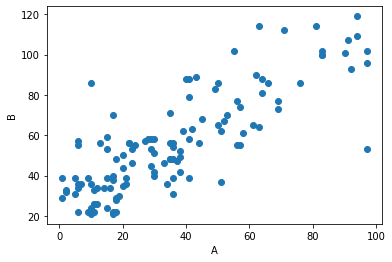

In [55]:
plt.scatter(df['A'], df['B'])  #산점도 그리기
plt.xlabel('A') #x축 라벨
plt.ylabel('B') #y축 라벨

plt.show()

그룹별로 다르게 색을 지정해보자.  
`scatter()` 함수의 `s`를 지정하여 각 점의 크기를 변경할 수 있다.  
예를 들어, 아래는 `C` 열에 따라 점의 크기가 달라진다. 

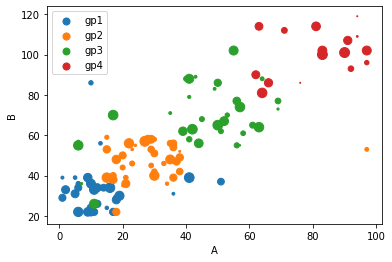

In [56]:
df_gp = df.groupby('gp')

for name, group in df_gp :
    plt.scatter(group.A, group.B, label = name, s = group.C)

plt.xlabel('A')
plt.ylabel('B')

plt.legend()
plt.show()

### 움직이는 산점도

시간에 따라 움직이는 산점도를 그려보자.  
데이터프레임 `df`는 아래와 같다. 이 데이터는 시간(Time)이 0일 때라고 가정하자. 

In [57]:
df

,rng,A,B,gp,C
0,2019-01-07,10.0,36.0,gp1,80.0
1,2019-01-14,10.0,21.0,gp1,18.0
2,2019-01-21,91.0,107.0,gp4,68.0
3,2019-01-28,15.0,39.0,gp2,89.0
4,2019-02-04,15.0,24.0,gp1,12.0
...,...,...,...,...,...
116,2021-03-29,58.0,61.0,gp3,22.0
117,2021-04-05,12.0,34.0,gp1,65.0
118,2021-04-12,18.0,28.0,gp1,65.0
119,2021-04-19,11.0,26.0,gp3,84.0


시간이 1, 2, 3, 4일 때는 데이터는 `ani.csv`에 담겨있다.  
`df`에서 산점도를 그리는 데 필요한 열만 가져오고, 0이 들어 있는 `Time`열을 추가한 다음, `ani.csv`파일의 데이터와 합하자. 

In [58]:
ani = pd.read_csv('ani.csv')
df_temp = df.copy()[['A', 'B', 'C', 'gp']]
df_temp['Time'] = 0

df_ani = pd.concat([df_temp, ani])
df_ani

,A,B,C,gp,Time
0,10.0,36.0,80.0,gp1,0
1,10.0,21.0,18.0,gp1,0
2,91.0,107.0,68.0,gp4,0
3,15.0,39.0,89.0,gp2,0
4,15.0,24.0,12.0,gp1,0
...,...,...,...,...,...
479,62.0,64.0,71.0,gp3,4
480,7.0,35.0,1.0,gp1,4
481,14.0,40.0,86.0,gp1,4
482,6.0,23.0,95.0,gp3,4


움직이는 산점도를 그리기 위해 필요한 모듈을 임포트하자. 

In [59]:
import matplotlib.animation as animation
from IPython.display import HTML

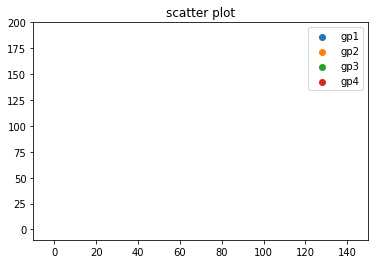

In [60]:
fig = plt.figure()   #도화지 준비
ax = fig.add_subplot()  
title = ax.set_title('scatter plot') # 제목 달기 
plt.axis([-10, 150, -10, 200]) # x축과 y축이 표시되는 범위 지정

scats = []  
df_ani_gp = df_ani.groupby('gp') # gp을 기준으로 그룹화

# 정적 그래프를 만들기  
for name, group in df_ani_gp : 
    scat = plt.scatter([], [],label = name)
    scats.append(scat)

plt.legend()

```python
>>> def update(i): # update 함수는 각 프레임에서 호출할 함수
        for scat, (name, data) in zip(scats, df_ani_gp) :
            sample = data[data['Time']==i] 
            scat.set_offsets(sample[['A', 'B']])  
            scat.set_sizes(sample.C) 
            title.set_text('scatter plot, time={}'.format(i)) 
        return scats,
# fig는 도화지, frames는 그릴 그림의 수, func은 각 프레임에서 호출할 함수
>>> anim = animation.FuncAnimation(fig = fig, func = update, frames = 5) 
>>> HTML(anim.to_html5_video()) #코랩에서 애니메이션을 보기 위해 작성하는 코드
```

만든 영상을 저장하는 코드는 아래와 같다.   
```python
>>> anim.save('ani.mp4')
```

# 판다스2 요약 

* 판다스 모듈 임포트 : `import pandas as pd`  
* <font color="red">csv 파일</font> 불러오기 : `pd.read_csv(파일이름)` 파일이름에는 경로를 포함하고, 문자열로 지정  
  * 특정열을 인덱스로 사용 : `index_col` 지정
  > 
  ```
  pd.read_csv('ABdata.csv', index_col = 'rng')
  ```
* csv 파일로 저장 : `df.to_csv('df.csv', index= False, header=False)` #df의 인덱스와 열이름 함께 저장 안 함.
---
* 데이터프레임의 <font color="red">기본정보 확인</font> : `df.info()`  
* 데이터프레임의 <font color="red">기초통계량</font>(빈도수, 평균, 최대최소 등) 확인 : `df.describe()`  
---
* <font color="red">유일한 값</font> 확인 : `df.특정열이름.unique()`  
* <font color="red">유일한 값과 그 빈도수</font> : `df.특정열이름.value_counts()`
* <font color="red">최댓값 또는 최솟값</font> 확인 : `max()` 또는 `min()`  
---
* 특정열을 기준으로 <font color="red">오름차순 정렬</font> : `df.sort_values('특정열이름')`  
* 특정열을 기준으로 <font color="red">내림차순 정렬</font> : `df.sort_values('특정열이름', ascending=False)`
---  
* <font color="red">그룹별</font>로 나누기 : `df.groupby('기준이될특정열이름')`  

> 
```
df_gp = df.groupby('기준이될특정열이름') #특정열기준으로 그룹이 나뉨
for gp in df_gp :
    print(gp)     #그룹명과 그룹에 해당하는 데이터를 튜플로 묶어서 보여줌

print(df_gp.mean()) #그룹별 평균을 보여줌.
print(df_gp.median()) #그룹별 중앙값을 보여줌.
```
---
* <font color="red">데이터프레임 합하기</font> : `pd.concat()` 또는 `pd.merge()` 사용
  * `pd.concat()` 
    * 위아래(<font color="red">행방향</font>)으로 합하기 : `pd.concat([df1, df2])`
    * <font color="red">인덱스 재배열</font> : `pd.concat([df1, df2], ignore_index = True)`
    * 좌우(<font color="red">열방향</font>)으로 합하기 : `pd.concat([df1, df2], axis = 1)`

  * `pd.merge()` 
    * 두 데이터프레임에 <font color="red">공통으로 있는 열을 기준</font>으로 합하기 : `pd.merge(df1, df2)`
    * <font color="red">기준으로 할 열을 지정</font> 가능. `left_on`에는 왼쪽 데이터프레임(df1)에서 기준으로 할 열이름, `right_on`에는 오른쪽 데이터프레임(df2)에서 기준으로 할 열이름 
    >
    ```
    pd.merge(df1, df2, left_on = 'key1', right_on = 'key2')
    ```

---
* <font color="red">결측치 처리<font color="red">
  * 특정열 <font color="red">삭제</font> : `del 특정열`
  * 결측치 다른 값으로 대체 : `df.fillna()`  
    * 모두 <font color="red">특정값</font>으로 대체 : `df.fillna(특정값)` #기존의 데이터프레임 변경 안됨 주의.
    * 결측치 위치 <font color="red">위쪽으로부터 가장 가까운 값</font> 넣기 : `df.fillna(method ='ffill')
    ` 
    * <font color="red">열마다 다른 값</font>으로 대체. 예를 들어, A열의 결측치는 0, B열의 결측치는 1, C열의 결측치는 2로 변경하고 싶다면, 아래 코드 이용. 
    > 
    ```
    values = {'A' : 0, 'B' : 1, 'C' : 2}
    df.fillna(value=values)
    ```
  * `fillna()`를 사용해도 기존 데이터프레임 변경 안 됨. 변경하고 싶다면, `inplace`를 `True`로 지정 
  >
  ```
  df.fillna(method='ffill', inplace=True)
  ```
---
* 상관계수. 예를 들어, df의 A열과 B열의 <font color="red">피어슨 상관계수</font>  
>
```
corr = df[['A', 'B']].corr(method = 'pearson')
```

# 데이터 시각화 요약

* 시각화 모듈 임포트 : `import matplotlib.pyplot as plt`
---
* 그래프 그릴 도화지 준비: `fig = plt.figure()`
  * 도화지 사이즈 변경 : `fig = plt.figure(figsize = (10, 8))` #10과 8을 적당한 값으로 변경
  * 도화지 분할 : `plt.subplot(1, 2, 1)` #도화지를 1x2크기로 나눈 다음 첫 번째 선택
  * 분할된 그래프간 간격 조절 : `plt.subplots_adjust(top = 0.80, wspace = 0.5)` #top은 그래프들 위의 여백, wspace는 그래프 양 옆의 간격

* 그래프 저장하기 : plt.savefig('파일이름.png')
* 그래프 보이기 : `plt.show()`
---
* 큰 제목 넣기 : `plt.suptitle('제목')`  
  * 제목 크기 변경 : `plt.suptitle('제목', fontsize=20)` #20을 적당한 값으로 변경  
* 제목 넣기 : `plt.title('제목')`
---
* 범례표시 : `plt.legend(median.index, loc = (1, 0.5))` #loc의 숫자 변경하여, 범례 위치 지정     
---
* <font color ='red'>막대그래프</font> : `plt.bar(항목, 빈도)`
  * 막대 색 변경 : `plt.bar(항목, 빈도, color = 색을담은배열)` 
  >
  ```
  colors = ['gray', 'gray', 'red']
  plt.bar(median.index, median, color = colors) # 이때 항목이 3개여야 함. 항목의 수가 n라면, colors의 크기도 n개를 사용. 
  ```

---
* <font color="red">원그래프(파이차트)</font> : `plt.pie(빈도)`  
  * 원 조각에 라벨 지정 :  `plt.pie(빈도, labels = 각조각에대한라벨)` ex)  `plt.pie(median, labels = median.index)` 
  * 백분율 표시 방법 : `autopct` 지정 ex)  `plt.pie(median, labels = median.index, autopct = '%0.1f%%')` #소수점 아래 한 자리까지 표시. %기호도 넣기.
  * 특정 조각 돌출 : `explode` 지정
  >
  ```
  explode = [0.0, 0.2, 0.0, 0.0] #총 4조각이 있고, 2번째 조각을 돌출
  plt.pie(median, labels = median.index, autopct = '%0.1f%%', explode=explode)
  ```
  * 도넛 모양 그래프 그리기 : `wedgeprops` 지정
  >
  ```
  explode = [0.0, 0.2, 0.0, 0.0]
  wedgeprops={'width': 0.7} #숫자 변경하면 그래프의 두께가 달라짐 
  plt.pie(median, labels = median.index, autopct = '%0.1f%%', explode=explode, wedgeprops=wedgeprops)
  ```

---
* <font color="red">선그래프</font> : `plt.plot(x축데이터, y축데이터)` 
  * 선 스타일 변경 : `linestyle` 지정   ex) `plt.plot(x축데이터, y축데이터, linestyle ='--')`
  * 마커 변경 : `marker` 지정 ex) `plt.plot(x축데이터, y축데이터, linestyle ='--', marker = 'o')`
  * 선 색 변경 : `color` 지정 ex) `plt.plot(x축데이터, y축데이터, linestyle ='--', marker = 'o', color = 'red')`  
* x축 눈금 변경 : `plt.xticks()`이용   
>
```
plt.xticks(range(10), df.rng[10:20], rotation=45) #10개 구간으로 나눠서, df.rng의 10부터 19까지의 값을 넣음. 값을 45도 기울림
```
---
* <font color="red">산점도</font> : `plt.scatter(x축값, y축값)`
  * x축 라벨 : `plt.xlabel('라벨')` 
  * y축 라벨 : `plt.ylabel('라벨')` 
  * 점의 크기 변경 : `s` 지정 
  >
  ```
   plt.scatter(x축값, y축값, s = 각점의크기배열)
  ```